# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np

## Load the data into a DataFrame
# df = pd.read_csv('../data/Iowa_Liquor_sales_sample_10pct.csv')
df = pd.read_csv('../datasets/Iowa_Liquor_Sales_reduced.csv')


/home/nick/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

df.insert(0, 'Year', df['Date'].dt.year)
df.insert(1, 'Month', df['Date'].dt.month)
# df['Year'] = df['Date'].dt.year

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,Year,Month,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016,3,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,2016,3,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,2016,3,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,2016,3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,2016,3,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [4]:
df.columns

Index([u'Year', u'Month', u'Date', u'Store Number', u'City', u'Zip Code',
       u'County Number', u'County', u'Category', u'Category Name',
       u'Vendor Number', u'Item Number', u'Item Description',
       u'Bottle Volume (ml)', u'State Bottle Cost', u'State Bottle Retail',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)'],
      dtype='object')

In [5]:
df.dtypes

Year                              int64
Month                             int64
Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [6]:
df.rename(columns={'State Bottle Cost':'State Bottle Cost (Dollars)', 'State Bottle Retail':'State Bottle Retail (Dollars)'}, inplace=True)

In [7]:
df['Sale (Dollars)'] = df['Sale (Dollars)'].replace('\$', '', regex=True).astype(float)
df['State Bottle Cost (Dollars)'] = df['State Bottle Cost (Dollars)'].replace('\$', '', regex=True).astype(float)
df['State Bottle Retail (Dollars)'] = df['State Bottle Retail (Dollars)'].replace('\$', '', regex=True).astype(float)

In [8]:
df.columns

Index([u'Year', u'Month', u'Date', u'Store Number', u'City', u'Zip Code',
       u'County Number', u'County', u'Category', u'Category Name',
       u'Vendor Number', u'Item Number', u'Item Description',
       u'Bottle Volume (ml)', u'State Bottle Cost (Dollars)',
       u'State Bottle Retail (Dollars)', u'Bottles Sold', u'Sale (Dollars)',
       u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [9]:
df.dtypes

Year                                      int64
Month                                     int64
Date                             datetime64[ns]
Store Number                              int64
City                                     object
Zip Code                                 object
County Number                           float64
County                                   object
Category                                float64
Category Name                            object
Vendor Number                             int64
Item Number                               int64
Item Description                         object
Bottle Volume (ml)                        int64
State Bottle Cost (Dollars)             float64
State Bottle Retail (Dollars)           float64
Bottles Sold                              int64
Sale (Dollars)                          float64
Volume Sold (Liters)                    float64
Volume Sold (Gallons)                   float64
dtype: object

In [10]:
for col in df:
    print df[col].isnull().value_counts()
    print ''

False    2709552
Name: Year, dtype: int64

False    2709552
Name: Month, dtype: int64

False    2709552
Name: Date, dtype: int64

False    2709552
Name: Store Number, dtype: int64

False    2709552
Name: City, dtype: int64

False    2709552
Name: Zip Code, dtype: int64

False    2698639
True       10913
Name: County Number, dtype: int64

False    2698639
True       10913
Name: County, dtype: int64

False    2708773
True         779
Name: Category, dtype: int64

False    2703443
True        6109
Name: Category Name, dtype: int64

False    2709552
Name: Vendor Number, dtype: int64

False    2709552
Name: Item Number, dtype: int64

False    2709552
Name: Item Description, dtype: int64

False    2709552
Name: Bottle Volume (ml), dtype: int64

False    2709552
Name: State Bottle Cost (Dollars), dtype: int64

False    2709552
Name: State Bottle Retail (Dollars), dtype: int64

False    2709552
Name: Bottles Sold, dtype: int64

False    2709552
Name: Sale (Dollars), dtype: int64

False    2709

In [11]:
df.head()

,Year,Month,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016,3,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,2016,3,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,2016,3,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77
3,2016,3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54
4,2016,3,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19


6468.0


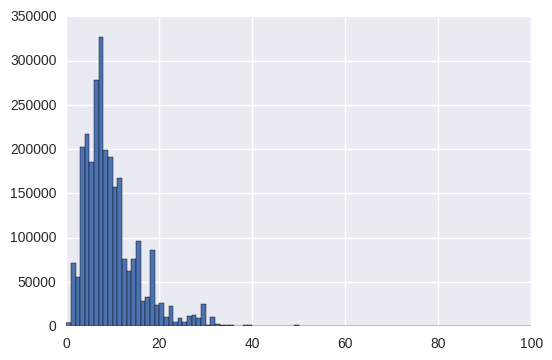

In [12]:
print max(df['State Bottle Cost (Dollars)'])
plt.hist(df['State Bottle Cost (Dollars)'], 100, range=[0, 100])
plt.show()

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [13]:
df.head()

,Year,Month,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016,3,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,2016,3,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,2016,3,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77
3,2016,3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54
4,2016,3,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19


In [14]:
store_totals_2015 = pd.pivot_table(df[(df['Year'] == 2015)], 
                                   values=['State Bottle Retail (Dollars)', 'Bottles Sold',
                                           'Volume Sold (Liters)', 'Volume Sold (Gallons)', 
                                           'Sale (Dollars)'], 
                                   index=['Store Number', 'County'], aggfunc=[np.sum, np.mean])
store_totals_2015.reset_index(inplace=True)
store_totals_2015.head()

Store Number       County          sum                 \
                            Bottles Sold Sale (Dollars)   
0         2106   Black Hawk        99998     1434369.85   
1         2113      Webster         6483       85763.42   
2         2130   Black Hawk        72562     1108184.99   
3         2152  Cerro Gordo         5928       72080.36   
4         2178    Allamakee        20504      277987.96   

                                                                            \
  State Bottle Retail (Dollars) Volume Sold (Gallons) Volume Sold (Liters)   
0                      82829.51              24832.44             93986.47   
1                      21725.74               1717.17              6500.83   
2                      60908.96              17321.29             65562.88   
3                      18507.48               1628.42              6164.92   
4                      40070.07               5737.98             21719.49   

          mean                                               \
  Bottles Sold Sale (Dollars) State Bottle Retail (Dollars)   
0    19.588247     280.973526                     16.225173   
1     4.763409      63.015004                     15.963071   
2    18.374778     280.624206                     15.423895   
3     4.131010      50.230216                     12.897199   
4     7.699587     104.389020                     15.046966   

                                              
  Volume Sold (Gallons) Volume Sold (Liters)  
0              4.864337            18.410670  
1              1.261697             4.776510  
2              4.386247            16.602401  
3              1.134787             4.296111  
4              2.154705             8.156023

In [15]:
store_totals_2015.columns

MultiIndex(levels=[[u'sum', u'mean', u'County', u'Store Number'], [u'Bottles Sold', u'Sale (Dollars)', u'State Bottle Retail (Dollars)', u'Volume Sold (Gallons)', u'Volume Sold (Liters)', u'']],
           labels=[[3, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [5, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

In [16]:
store_totals_2015.columns = [' '.join(col).strip() for col in store_totals_2015.columns.values]

In [17]:
store_totals_2015.head()

,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum State Bottle Retail (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean State Bottle Retail (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters)
0,2106,Black Hawk,99998,1434369.85,82829.51,24832.44,93986.47,19.588247,280.973526,16.225173,4.864337,18.410670
1,2113,Webster,6483,85763.42,21725.74,1717.17,6500.83,4.763409,63.015004,15.963071,1.261697,4.776510
2,2130,Black Hawk,72562,1108184.99,60908.96,17321.29,65562.88,18.374778,280.624206,15.423895,4.386247,16.602401
3,2152,Cerro Gordo,5928,72080.36,18507.48,1628.42,6164.92,4.131010,50.230216,12.897199,1.134787,4.296111
4,2178,Allamakee,20504,277987.96,40070.07,5737.98,21719.49,7.699587,104.389020,15.046966,2.154705,8.156023


In [18]:
jan_thru_march_2015 = pd.pivot_table(df[((df['Year'] == 2015) & (df['Month'] <= 3))], 
                                   values=['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)'], 
                                   index=['Store Number'], aggfunc=[np.sum])
jan_thru_march_2015.reset_index(inplace=True)
jan_thru_march_2015.columns = [' '.join(col).strip() for col in jan_thru_march_2015.columns.values]
jan_thru_march_2015.head()

,Store Number,sum Bottles Sold,sum Sale (Dollars),sum Volume Sold (Liters)
0,2106,23316,337166.53,21815.55
1,2113,1618,22351.86,1604.08
2,2130,17707,277764.46,16176.37
3,2152,1375,16805.11,1414.59
4,2178,4279,54411.42,4376.38


In [19]:
# I'm saving these specific columns because they were most predictive, as I'll show below
# Having these columns for the first three months will allow me to build a model to use to predict 
# the total yearly sales in 2016, since the first three months are all the data we have for 2016
jan_thru_march_2015.columns = ['Store Number', 'sum Jan-March Bottles Sold', 'sum Jan-March Sales (Dollars)', 
                               'sum Jan-March Volume Sold (Liters)']
jan_thru_march_2015.head()

,Store Number,sum Jan-March Bottles Sold,sum Jan-March Sales (Dollars),sum Jan-March Volume Sold (Liters)
0,2106,23316,337166.53,21815.55
1,2113,1618,22351.86,1604.08
2,2130,17707,277764.46,16176.37
3,2152,1375,16805.11,1414.59
4,2178,4279,54411.42,4376.38


In [20]:
store_totals_2015 = pd.merge(store_totals_2015, jan_thru_march_2015, on='Store Number', how='left')
store_totals_2015.head()

,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum State Bottle Retail (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean State Bottle Retail (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters),sum Jan-March Bottles Sold,sum Jan-March Sales (Dollars),sum Jan-March Volume Sold (Liters)
0,2106,Black Hawk,99998,1434369.85,82829.51,24832.44,93986.47,19.588247,280.973526,16.225173,4.864337,18.410670,23316.0,337166.53,21815.55
1,2113,Webster,6483,85763.42,21725.74,1717.17,6500.83,4.763409,63.015004,15.963071,1.261697,4.776510,1618.0,22351.86,1604.08
2,2130,Black Hawk,72562,1108184.99,60908.96,17321.29,65562.88,18.374778,280.624206,15.423895,4.386247,16.602401,17707.0,277764.46,16176.37
3,2152,Cerro Gordo,5928,72080.36,18507.48,1628.42,6164.92,4.131010,50.230216,12.897199,1.134787,4.296111,1375.0,16805.11,1414.59
4,2178,Allamakee,20504,277987.96,40070.07,5737.98,21719.49,7.699587,104.389020,15.046966,2.154705,8.156023,4279.0,54411.42,4376.38


In [21]:
store_totals_2015['sum Jan-March Sales (Dollars)'].isnull().value_counts()

False    1283
True       92
Name: sum Jan-March Sales (Dollars), dtype: int64

In [22]:
# Dropping the null rows, because they likely consist of stores that were not open for the entire year.
# Including partial year totals would likely skew the data.
store_totals_2015.dropna(inplace=True)

In [23]:
total_number_of_2015_sales = pd.DataFrame(df['Store Number'].value_counts()).reset_index()

total_number_of_2015_sales.columns = ['Store Number', 'Total Number of Sales']
total_number_of_2015_sales.head()

,Store Number,Total Number of Sales
0,2633,24336
1,4829,22851
2,2512,17962
3,2572,17085
4,2515,16167


In [24]:
store_totals_2015 = pd.merge(store_totals_2015, total_number_of_2015_sales, on='Store Number', how='left')
store_totals_2015.head(20)

,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum State Bottle Retail (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean State Bottle Retail (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters),sum Jan-March Bottles Sold,sum Jan-March Sales (Dollars),sum Jan-March Volume Sold (Liters),Total Number of Sales
0,2106,Black Hawk,99998,1434369.85,82829.51,24832.44,93986.47,19.588247,280.973526,16.225173,4.864337,18.410670,23316.0,337166.53,21815.55,6334
1,2113,Webster,6483,85763.42,21725.74,1717.17,6500.83,4.763409,63.015004,15.963071,1.261697,4.776510,1618.0,22351.86,1604.08,1754
2,2130,Black Hawk,72562,1108184.99,60908.96,17321.29,65562.88,18.374778,280.624206,15.423895,4.386247,16.602401,17707.0,277764.46,16176.37,4988
3,2152,Cerro Gordo,5928,72080.36,18507.48,1628.42,6164.92,4.131010,50.230216,12.897199,1.134787,4.296111,1375.0,16805.11,1414.59,1742
4,2178,Allamakee,20504,277987.96,40070.07,5737.98,21719.49,7.699587,104.389020,15.046966,2.154705,8.156023,4279.0,54411.42,4376.38,3262
5,2190,Polk,107522,1228571.74,229725.84,17021.88,64391.65,8.357065,95.489798,17.855265,1.323013,5.004792,22457.0,255939.81,14065.73,16016
6,2191,Lee,79024,1275911.76,95227.02,21458.29,81224.18,14.200180,229.274350,17.111774,3.855937,14.595540,20120.0,319020.69,20393.82,7055
7,2200,Sac,15410,223914.99,67743.76,4567.20,17291.84,3.970626,57.695179,17.455233,1.176810,4.455511,3075.0,45340.33,3393.35,4822
8,2205,Page,17892,231651.87,44477.09,3941.03,14919.66,6.048682,78.313682,15.036204,1.332329,5.043834,4556.0,57849.23,3765.60,2958
9,2228,Madison,14932,188879.70,42250.12,4013.71,15188.97,5.296914,67.002377,14.987627,1.423806,5.388070,3974.0,51031.04,4213.40,3489


In [25]:
for col in store_totals_2015:
    print store_totals_2015[col].isnull().value_counts()
    print ''

False    1283
Name: Store Number, dtype: int64

False    1283
Name: County, dtype: int64

False    1283
Name: sum Bottles Sold, dtype: int64

False    1283
Name: sum Sale (Dollars), dtype: int64

False    1283
Name: sum State Bottle Retail (Dollars), dtype: int64

False    1283
Name: sum Volume Sold (Gallons), dtype: int64

False    1283
Name: sum Volume Sold (Liters), dtype: int64

False    1283
Name: mean Bottles Sold, dtype: int64

False    1283
Name: mean Sale (Dollars), dtype: int64

False    1283
Name: mean State Bottle Retail (Dollars), dtype: int64

False    1283
Name: mean Volume Sold (Gallons), dtype: int64

False    1283
Name: mean Volume Sold (Liters), dtype: int64

False    1283
Name: sum Jan-March Bottles Sold, dtype: int64

False    1283
Name: sum Jan-March Sales (Dollars), dtype: int64

False    1283
Name: sum Jan-March Volume Sold (Liters), dtype: int64

False    1283
Name: Total Number of Sales, dtype: int64



### Deciding which variables to use in the model.
The 'sum Sale (Dollars)' column represents the total sales for 2015 for each store. This will be our target (y) variable in the model, since this is what we are trying to predict.

Other variables I think might be useful to predict yearly total sales are:
* Total sales for that store during the first three months of the year (Jan-March sum Sales (Dollars))
* Total number of bottles sold (sum Bottles sold)
* Average retail price per bottle (mean State Bottle Retail (Dollars))
* Total volume sold (sum Volume Sold (Liters))
* Total number of sales in 2015 (Total Number of Sales)
* Average value of a sale (mean Sale (Dollars))

In [26]:
X_list = ['sum Jan-March Sales (Dollars)', 'sum Bottles Sold', 'mean State Bottle Retail (Dollars)', 
         'sum Volume Sold (Liters)', 'Total Number of Sales', 'mean Sale (Dollars)']

In [27]:
pair_list = []
for first in range(len(X_list)):
    for second in range(len(X_list)):
        if first > second:
            pair_list.append([X_list[first], X_list[second]])

pair_list

[['sum Bottles Sold', 'sum Jan-March Sales (Dollars)'],
 ['mean State Bottle Retail (Dollars)', 'sum Jan-March Sales (Dollars)'],
 ['mean State Bottle Retail (Dollars)', 'sum Bottles Sold'],
 ['sum Volume Sold (Liters)', 'sum Jan-March Sales (Dollars)'],
 ['sum Volume Sold (Liters)', 'sum Bottles Sold'],
 ['sum Volume Sold (Liters)', 'mean State Bottle Retail (Dollars)'],
 ['Total Number of Sales', 'sum Jan-March Sales (Dollars)'],
 ['Total Number of Sales', 'sum Bottles Sold'],
 ['Total Number of Sales', 'mean State Bottle Retail (Dollars)'],
 ['Total Number of Sales', 'sum Volume Sold (Liters)'],
 ['mean Sale (Dollars)', 'sum Jan-March Sales (Dollars)'],
 ['mean Sale (Dollars)', 'sum Bottles Sold'],
 ['mean Sale (Dollars)', 'mean State Bottle Retail (Dollars)'],
 ['mean Sale (Dollars)', 'sum Volume Sold (Liters)'],
 ['mean Sale (Dollars)', 'Total Number of Sales']]

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

This is lumped in with the sections above and below.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [28]:
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

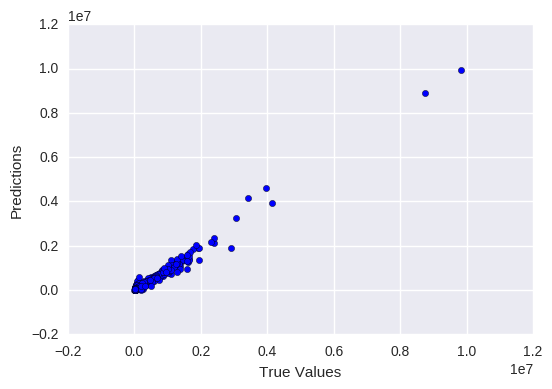

Score:  0.980857544912


In [29]:
# First checking a model based on only the Jan-March sales
y = store_totals_2015['sum Sale (Dollars)']
X = store_totals_2015['sum Jan-March Sales (Dollars)'].as_matrix().reshape(-1, 1)

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print 'Score: ', model.score(X, y)

The Jan-March sales seem to be a very good predictor of the yearly sales, implying that sales are likely fairly consistent on a quarterly basis.

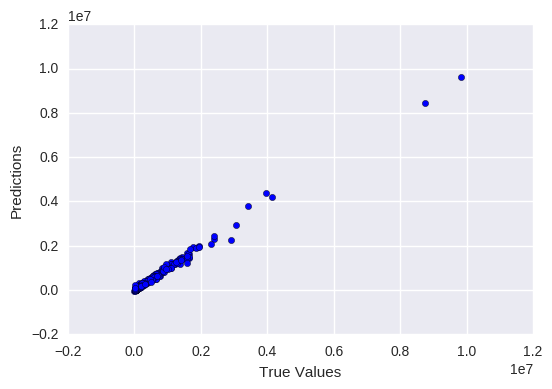

Score:  0.993137672375


In [30]:
# Now testing on all 6 of the variables I identified earlier
y = store_totals_2015['sum Sale (Dollars)']
X = store_totals_2015[X_list]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print 'Score: ', model.score(X, y)

The model score slightly improved after including all six variables.

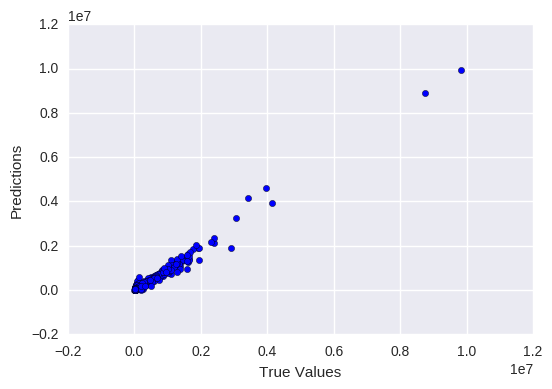

Score for  sum Jan-March Sales (Dollars) is:  0.980857544912



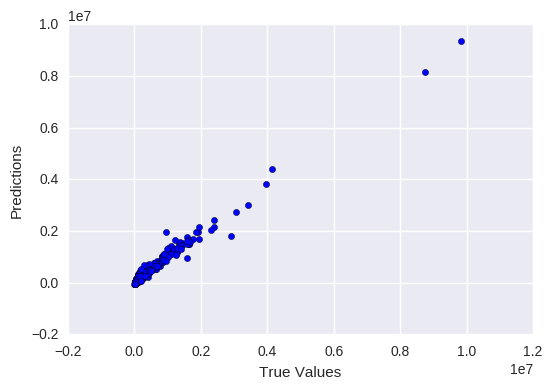

Score for  sum Bottles Sold is:  0.973134677887



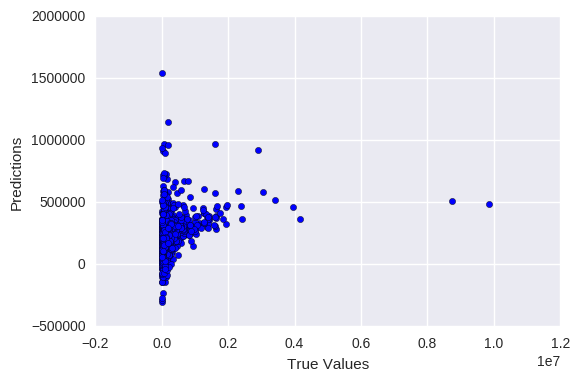

Score for  mean State Bottle Retail (Dollars) is:  0.0951461115426



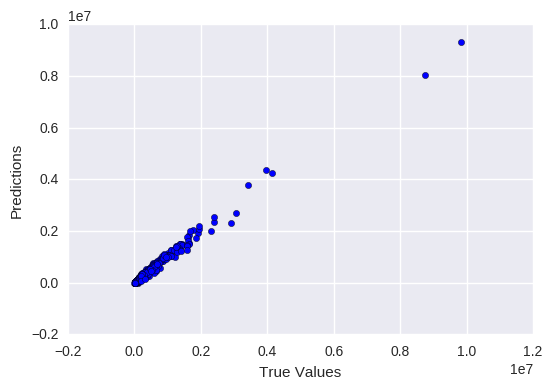

Score for  sum Volume Sold (Liters) is:  0.986626140915



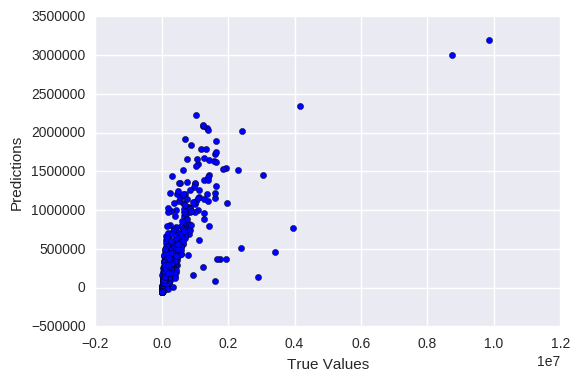

Score for  Total Number of Sales is:  0.537399750071



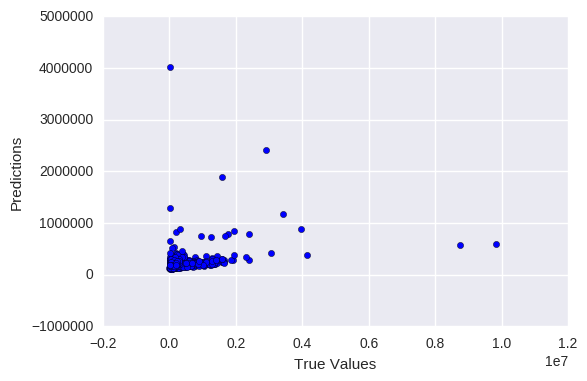

Score for  mean Sale (Dollars) is:  0.0905336528099



In [31]:
# Now testing one variable at a time
for i in range(len(X_list)):
    y = store_totals_2015['sum Sale (Dollars)']
    X = store_totals_2015[X_list[i]].as_matrix().reshape(-1, 1)

    lm = linear_model.LinearRegression()
    model = lm.fit(X, y)
    predictions = lm.predict(X)

    plt.scatter(y, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.show()
    print 'Score for ', X_list[i], 'is: ', model.score(X, y)
    print ''

In [32]:
# And now trying every combination of two variables
for i in range(len(pair_list)):
    y = store_totals_2015['sum Sale (Dollars)']
    X = store_totals_2015[pair_list[i]]

    lm = linear_model.LinearRegression()
    model = lm.fit(X, y)
    predictions = lm.predict(X)

#     plt.scatter(y, predictions)
#     plt.xlabel("True Values")
#     plt.ylabel("Predictions")
#     plt.show()
    print 'Score for ', pair_list[i], 'is: ', model.score(X, y)

Score for  ['sum Bottles Sold', 'sum Jan-March Sales (Dollars)'] is:  0.98874852393
Score for  ['mean State Bottle Retail (Dollars)', 'sum Jan-March Sales (Dollars)'] is:  0.981408383828
Score for  ['mean State Bottle Retail (Dollars)', 'sum Bottles Sold'] is:  0.976084601175
Score for  ['sum Volume Sold (Liters)', 'sum Jan-March Sales (Dollars)'] is:  0.991296889729
Score for  ['sum Volume Sold (Liters)', 'sum Bottles Sold'] is:  0.988584030808
Score for  ['sum Volume Sold (Liters)', 'mean State Bottle Retail (Dollars)'] is:  0.986668226347
Score for  ['Total Number of Sales', 'sum Jan-March Sales (Dollars)'] is:  0.983629336332
Score for  ['Total Number of Sales', 'sum Bottles Sold'] is:  0.97609949465
Score for  ['Total Number of Sales', 'mean State Bottle Retail (Dollars)'] is:  0.549440673993
Score for  ['Total Number of Sales', 'sum Volume Sold (Liters)'] is:  0.987107824967
Score for  ['mean Sale (Dollars)', 'sum Jan-March Sales (Dollars)'] is:  0.981545458262
Score for  ['mean 

The 'mean State Bottle Retail (Dollars)', 'Total Number of Sales', and 'mean Sale (Dollars)' columns don't seem to be very predictive of the total yearly sales. Below I'll try dropping them from the model, and testing on only the other three variables.

In [33]:
new_X_list = ['sum Jan-March Sales (Dollars)', 'sum Bottles Sold', 'sum Volume Sold (Liters)']

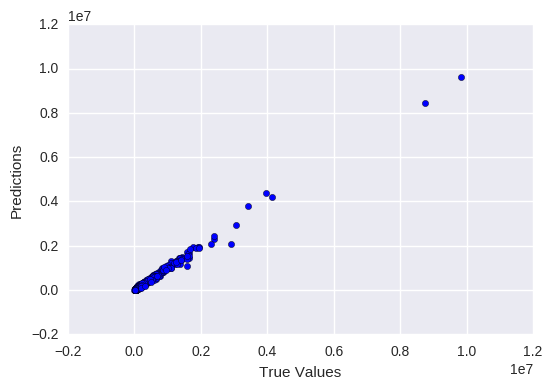

Score:  0.992276461643


In [34]:
# Testing a model based on only these three variables
y = store_totals_2015['sum Sale (Dollars)']
X = store_totals_2015[new_X_list]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print 'Score: ', model.score(X, y)

This actually slightly lowers the score. Below I'll use a train-test model to check both cases.

In [35]:
# Now using a train-test model with all six variables
X = store_totals_2015[X_list]

In [36]:
six_var_r2_list = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    lm = linear_model.LinearRegression()

    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)

    ## The line / model
#     plt.scatter(y_test, predictions)
#     plt.xlabel("True Values")
#     plt.ylabel("Predictions")
    #plt.show()
    six_var_r2_list.append(model.score(X_test, y_test))

print 'Average score after 1000 simulations: ', np.mean(six_var_r2_list)

Average score after 1000 simulations:  0.987869204127


In [37]:
# Now using a train-test model with only three variables
X = store_totals_2015[new_X_list]

In [38]:
three_var_r2_list = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    lm = linear_model.LinearRegression()

    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)

    ## The line / model
#     plt.scatter(y_test, predictions)
#     plt.xlabel("True Values")
#     plt.ylabel("Predictions")
#     plt.show()
    three_var_r2_list.append(model.score(X_test, y_test))

print 'Average score after 1000 simulations: ', np.mean(three_var_r2_list)

Average score after 1000 simulations:  0.989461539649


I ran each train-test model 1000 times and took the average score to determine which model was more accurate. The list of only three variables yields a slightly higher average score when presented with unknown data than the model with the full six variables. I'm likely going to use the three variable model to project 2016 sales, since it is a bit more accurate and also less complex.

I'll use cross validation to again check how each model performs.

Cross-validated scores: [ 0.99026137  0.97008963  0.98321028  0.89479569  0.9953361   0.85023275]
Cross-Predicted Accuracy: 0.988567691027


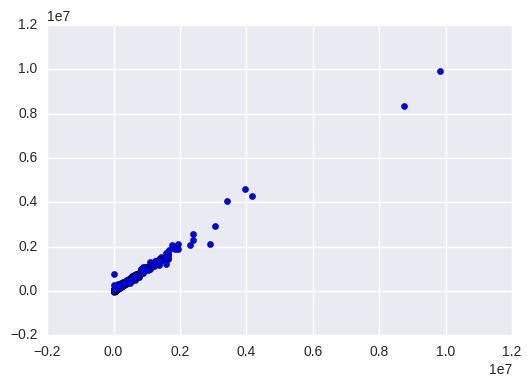

In [39]:
# Six variable model cross-validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

X = store_totals_2015[X_list]

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

Cross-validated scores: [ 0.98988853  0.96581465  0.98360436  0.9449331   0.99417659  0.97661567]
Cross-Predicted Accuracy: 0.989933252618


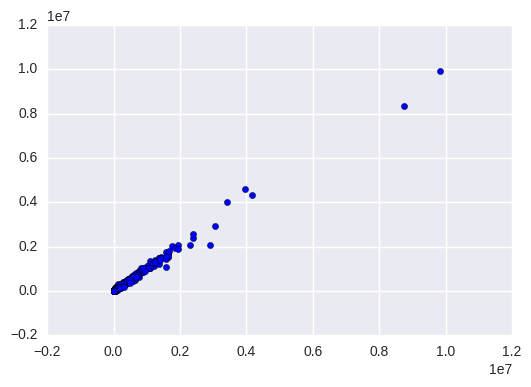

In [40]:
# Three variable model cross-validation

X = store_totals_2015[new_X_list]

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

The three variable model again performs slightly better. I'll use these variables to predict the yearly sales for 2016.

Since the 2016 data only includes only the first three months, I'll need to build a model using the first three months of data from 2015 and use that to project the total yearly sales in 2016.

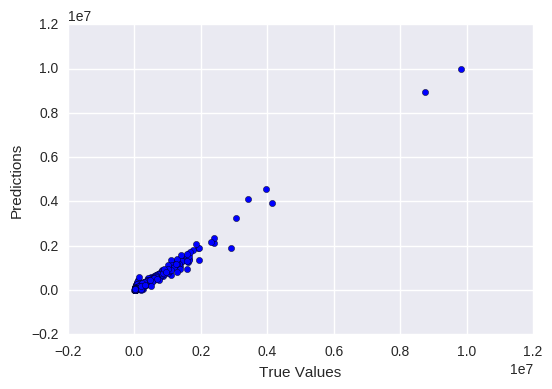

Score:  0.980967962944


In [41]:
# Create model based off the first three months of 2015 data
y = store_totals_2015['sum Sale (Dollars)']
X = store_totals_2015[['sum Jan-March Bottles Sold', 'sum Jan-March Sales (Dollars)', 'sum Jan-March Volume Sold (Liters)']]

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print 'Score: ', model.score(X, y)

In [42]:
# Create the pivot table for 2016 sales
store_totals_2016 = pd.pivot_table(df[(df['Year'] == 2016)], 
                                   values=['State Bottle Retail (Dollars)', 'Bottles Sold',
                                           'Volume Sold (Liters)', 'Volume Sold (Gallons)', 
                                           'Sale (Dollars)'], 
                                   index=['Store Number', 'County'], aggfunc=[np.sum, np.mean])
store_totals_2016.reset_index(inplace=True)
store_totals_2016.columns = [' '.join(col).strip() for col in store_totals_2016.columns.values]
store_totals_2016.head()

,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum State Bottle Retail (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean State Bottle Retail (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters)
0,2106,Black Hawk,23605,337804.05,19318.38,5886.01,22277.95,19.206672,274.860903,15.718779,4.789268,18.126892
1,2113,Webster,1703,21736.63,6274.43,424.70,1608.07,4.333333,55.309491,15.965471,1.080662,4.091781
2,2130,Black Hawk,19832,306942.27,15837.75,4801.01,18172.75,19.087584,295.420857,15.243263,4.620799,17.490616
3,2152,Cerro Gordo,749,9307.75,3085.95,211.07,799.39,3.435780,42.696101,14.155734,0.968211,3.666927
4,2178,Allamakee,4539,58939.90,9276.85,1216.93,4606.64,7.577629,98.397162,15.487229,2.031603,7.690551


In [43]:
# Predict total sales based off of the first three months of 2016 data
X_2016 = store_totals_2016[['sum Bottles Sold', 'sum Sale (Dollars)', 'sum Volume Sold (Liters)']]
predictions_2016 = model.predict(X_2016)

In [44]:
print predictions_2016.shape
print store_totals_2016['sum Sale (Dollars)'].shape

store_totals_2016['Predicted 2016 Sales'] = predictions_2016
store_totals_2016.head()

(1290,)
(1290,)


,Store Number,County,sum Bottles Sold,sum Sale (Dollars),sum State Bottle Retail (Dollars),sum Volume Sold (Gallons),sum Volume Sold (Liters),mean Bottles Sold,mean Sale (Dollars),mean State Bottle Retail (Dollars),mean Volume Sold (Gallons),mean Volume Sold (Liters),Predicted 2016 Sales
0,2106,Black Hawk,23605,337804.05,19318.38,5886.01,22277.95,19.206672,274.860903,15.718779,4.789268,18.126892,1.441792e+06
1,2113,Webster,1703,21736.63,6274.43,424.70,1608.07,4.333333,55.309491,15.965471,1.080662,4.091781,1.005552e+05
2,2130,Black Hawk,19832,306942.27,15837.75,4801.01,18172.75,19.087584,295.420857,15.243263,4.620799,17.490616,1.319665e+06
3,2152,Cerro Gordo,749,9307.75,3085.95,211.07,799.39,3.435780,42.696101,14.155734,0.968211,3.666927,4.751786e+04
4,2178,Allamakee,4539,58939.90,9276.85,1216.93,4606.64,7.577629,98.397162,15.487229,2.031603,7.690551,2.554981e+05


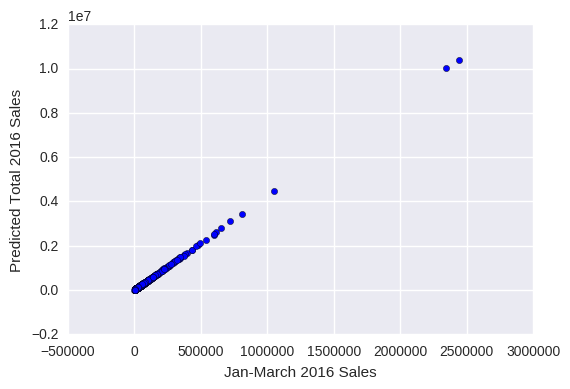

In [45]:
plt.scatter(store_totals_2016['sum Sale (Dollars)'], predictions_2016)
plt.ylabel("Predicted Total 2016 Sales")
plt.xlabel("Jan-March 2016 Sales")
plt.show()

In [46]:
projected_2016_df = store_totals_2016[['Store Number', 'County', 'sum Sale (Dollars)', 'Predicted 2016 Sales']]
projected_2016_df.columns = ['Store Number', 'County', 'Jan-March 2016 Sales', 'Projected Total 2016 Sales']
projected_2016_df.head(20)

,Store Number,County,Jan-March 2016 Sales,Projected Total 2016 Sales
0,2106,Black Hawk,337804.05,1.441792e+06
1,2113,Webster,21736.63,1.005552e+05
2,2130,Black Hawk,306942.27,1.319665e+06
3,2152,Cerro Gordo,9307.75,4.751786e+04
4,2178,Allamakee,58939.90,2.554981e+05
5,2190,Polk,332979.03,1.461751e+06
6,2191,Lee,302592.88,1.290713e+06
7,2200,Sac,55315.23,2.394194e+05
8,2228,Madison,42398.57,1.863397e+05
9,2233,Dickinson,56241.57,2.439754e+05


In [47]:
county_sales_2015 = pd.pivot_table(store_totals_2015, 
                                   values=['sum Sale (Dollars)'], 
                                   index=['County'], aggfunc=[np.sum])
county_sales_2015.reset_index(inplace=True)
county_sales_2015.columns = [' '.join(col).strip() for col in county_sales_2015.columns.values]
county_sales_2015.columns = ['County', 'Total 2015 Sales']
county_sales_2015

,County,Total 2015 Sales
0,Adair,424750.82
1,Adams,100596.80
2,Allamakee,823579.28
3,Appanoose,835381.93
4,Audubon,123441.49
5,Benton,726075.75
6,Black Hawk,15968396.96
7,Boone,1751063.03
8,Bremer,1784821.71
9,Buchanan,1297984.66


In [48]:
county_sales_2016 = pd.pivot_table(projected_2016_df, 
                                   values=['Projected Total 2016 Sales'], 
                                   index=['County'], aggfunc=[np.sum])
county_sales_2016.reset_index(inplace=True)
county_sales_2016.columns = [' '.join(col).strip() for col in county_sales_2016.columns.values]
county_sales_2016.columns = ['County', 'Projected Total 2016 Sales']
county_sales_2016['Projected Total 2016 Sales'] = county_sales_2016['Projected Total 2016 Sales']
pd.set_option('display.float_format', lambda x: '%.2f' % x)
county_sales_2016.head()

,County,Projected Total 2016 Sales
0,Adair,504447.31
1,Adams,100829.20
2,Allamakee,801097.36
3,Appanoose,797074.73
4,Audubon,171164.68


In [49]:
county_totals_both = pd.merge(county_sales_2015, county_sales_2016, on='County', how='left')
county_totals_both['Change in Sales From 2015 to 2016'] = county_totals_both['Projected Total 2016 Sales'] - county_totals_both['Total 2015 Sales']


from IPython.display import display, HTML
HTML(county_totals_both.to_html())
county_totals_both.to_csv('/home/nick/Dropbox/iowa_final.csv')

In [50]:
neg_count = 0
pos_count = 0
for i in range(len(county_totals_both['Change in Sales From 2015 to 2016'])):
    if county_totals_both['Change in Sales From 2015 to 2016'][i] < 0:
        neg_count += 1
    elif county_totals_both['Change in Sales From 2015 to 2016'][i] > 0:
        pos_count += 1
        
print 'Number of Counties with projected sales increases:', pos_count
print 'Number of Counties with projected sales decreases:', neg_count
print 'Dickinson County has the largest projected decrease, at %.2f' % min(county_totals_both['Change in Sales From 2015 to 2016'])
print 'Polk County has the largest projected increase, at %.2f' % max(county_totals_both['Change in Sales From 2015 to 2016'])

Number of Counties with projected sales increases: 58
Number of Counties with projected sales decreases: 41
Dickinson County has the largest projected decrease, at -1070539.83
Polk County has the largest projected increase, at 4692765.80


In [51]:
print 'The Total statewide sales for 2015 were:', '$%.2f' % sum(store_totals_2015['sum Sale (Dollars)'])
print 'The Total projected sales for 2016 are:', '$%.2f' % sum(projected_2016_df['Projected Total 2016 Sales'])

The Total statewide sales for 2015 were: $278247734.45
The Total projected sales for 2016 are: $284545237.77


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

Plots are included above in each step of creating and testing the various models. Also some cool Iowa maps are below.

![](iowa1.png)
![](iowa2.png)
![](iowa3.png)
![](iowa4.png)

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

http://nick-dsi.blogspot.com/2016/10/project-3-liquor-sales-linear-regression_17.html